# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например:
- Рейтинг `E` - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- Рейтинг `E10+` - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- Рейтинг `T` - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- Рейтинг `M` - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import numpy as np
from scipy import stats as st

## Шаг. Обзор данных

In [2]:
games = pd.read_csv('/datasets/games.csv', sep=',') # читаем csv-файл

#### Выведим первые строки датафрэйма `games`. 

In [3]:
pd.set_option('max_columns', None) # условие для отображения всх столбцов датафрэйма
games.head(10) # покажем первые 10 строчек датафрейма users_go.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Посмотрим общую информацию о таблице c помощью метода info().

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак в таблице 10 столбцов. Типы данных - object, float64.

Из документации к данным.

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Выводы:** 

В каждой строке таблицы — данные о выпущенной игре. Часть колонок описывает саму игру: название, платформа, год выпуска и жанр. В части колонок хранится информация о продажах на разных территориях. Последние колонки содержат информацию о рейтингах игры, в том числе возрастном.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Шаг. Предобработка данных

#### Стиль заголовков.

In [5]:
# выведем на экран название всех столбцов
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все названия с заглавным букв, приведем все к строчному регистру.

In [6]:
# переименование столбцов
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
# проверка результатов - перечень названий столбцов
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Проверим общее количество пропусков  в датафрэйме.

In [8]:
# подсчёт пропусков
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски встречаются в столбцах с названием игры, годом релиза, жанром. И так же в информации о рейтингах игр. 

  - Пропусков с годом релиза всего 269 строк, с наименованием игры и жанром - 2, удалим эти строки. Так как в дальнейшем эти показатели важны для анализа, а количество пропусков не значительно.
  - Пропуски в `scores` заполнять не будем, так как любая замена исказит результаты дальнейшего статистического анализы.
  - Пропуски в `rating` можно заменить заглушкой, например `unknown`. Так как данные в последнем столбце категориальные.

In [9]:
# удаление строк, в которых в столбце 'year_of_release' встречается NaN
games = games.dropna(subset=['year_of_release', 'name', 'genre'])
# проверим наличие пропусков после обработки
print(games['year_of_release'].isna().sum(), games['name'].isna().sum(), games['genre'].isna().sum())

0 0 0


Заменим пропуски в столбце `rating` заглушкой`unknown`.

In [10]:
# Заменим пропуски в столбце rating заглушкой unknown.
games['rating'] = games['rating'].fillna('unknown')

# Посмотрим уникальные значения в столбце rating после замены
print(games['rating'].unique())

['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


#### Заменим вещественный тип данных в столбце 'year_of_release' на целочисленный.

In [11]:
# заменим тип данных на целочисленный с помощью метода astype()
games['year_of_release'] = games['year_of_release'].astype('int')

#### Заменим тип данных в столбце 'user_score' на вещественный.

In [12]:
# сначала проверим какие оценки встречаются
print(games['user_score'].unique())
# сколько оценок  "tbd"
print('Оценка "tbd": ', len(games.query('user_score == "tbd"')))
# сколько пропусков до обработки
games['user_score'].isna().sum()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Оценка "tbd":  2376


6605

В целом данные корректны: оценки от 0 до 10. 

Но встречается оценка 'tbd'(To Be Determined - будет определен) - это означает что игра собрала менее 4 отзывов, как только количество отзывов станет равно или больше 4, то система расчитает оценку. Поэтому заменить этот показатель на 0 или 10 - нельзя. Удалять эти строки нельзя, так как таких игр более 2 тысяч. Заменим их на пропуски, так как числовая замена может исказить дальнейший анализ, а реальные оценки по этим играм расчитать невозможно.

Для этого есть стандартный метод Pandas —  to_numeric(). Он превращает значения столбца в числовой тип float64 (вещественное число). `errors='coerce'` — некорректные значения принудительно заменяются на NaN.

In [13]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
# проверим сколько пропусков после обработки
games['user_score'].isna().sum()

8981

После преобразований количество пропущенных значений увеличилось и стало 8981 (2376+6605 = 8981).

#### Проверим таблицу на наличие дубликатов.

In [14]:
# подсчёт явных дубликатов
games.duplicated().sum()

0

Явных дубликатов нет.

Проверим датафрэйм на наличие дубликатов по информации об игре, т.е. первые три столбика: название, платформа и год выпуска. 

In [15]:
games.duplicated(['name', 'platform', 'year_of_release']).sum()

1

Встречается одна строка с дубликатом. Удалим повторяющиеся значения.

In [16]:
# удалим дубликаты
games = games.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index(drop=True)

#### Посчитаем сумарные продажи во всех регионах и запишем их в отдельный столбец.

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [17]:
# добавим новый столбец к датафрэйму.
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

#### Итоговый датафрэйм после предобработки.

In [18]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


In [19]:
# общая информация о датафрэйме
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**В результате предобработки данных:** 

- привели названия столбцов к нижнему регистру.
- удалили строки с пропусками в столбцах `name`, `year_of_release`, `genre`.
- заменили пропущенные значения в столбце `rating` на значение `unknown`
- Изменили тип данных в столбцах `year_of_release`, `user_score`.
- добавили новый столбец с информацией о суммарных продажах по всем регионам.

In [20]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Шаг. Исследовательский анализ.

#### Проанализируем динамику выпуска игр по годам.

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

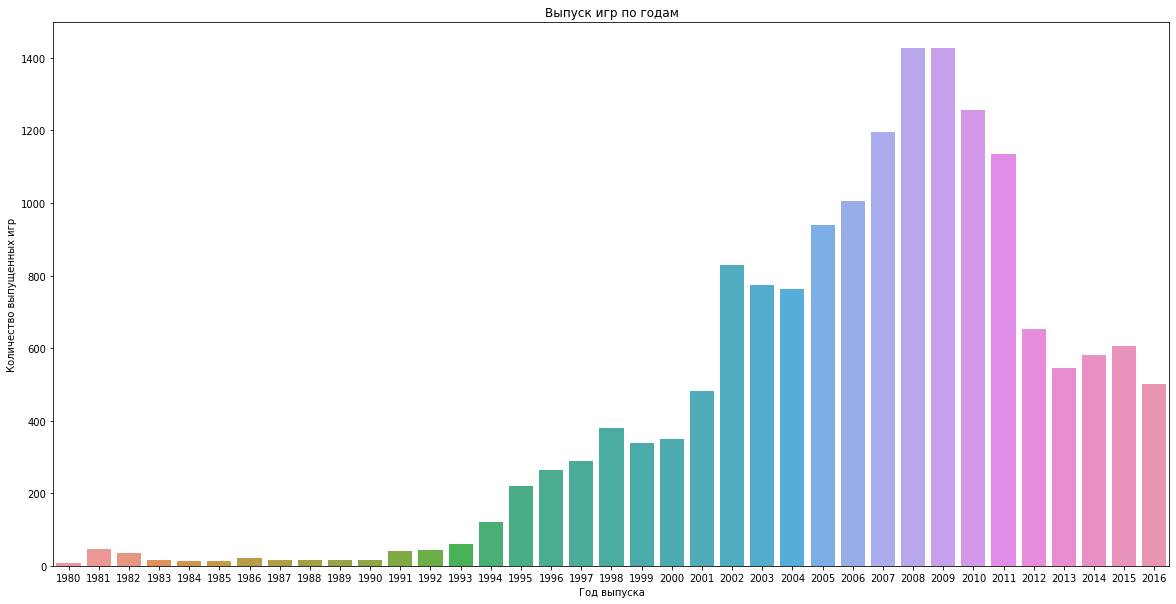

In [21]:
# сгруппируем данные по годам в сводной таблице
year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
year.columns = ['name_count']

matplotlib.rcParams['figure.figsize'] = [20, 10] # указываем размер графика

# вызываем функцию barplot()
seaborn.barplot(x=year.index, y=year['name_count'])
plt.title("Выпуск игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

Результат — визуализация числа выпущенных компьютерных игр с 1980 по 2016 год. На графике хорошо видно, что с 1994 года количество выпускаемых игр начинает расти. Больше всего игр вышло в 2008-2009 годах, после чего количество выпусков начало падать.

Отвечая на вопрос: Важны ли данные за все периоды? - Нет. Можно сказать, что до 1995 в год выпускалось не более 200 игр, по сравнению с годами после. 

Примем за нижнюю границу 1994 год, остальные данные отбросим. 

In [22]:
# вызовем метод query
games = games.query('year_of_release >= 1994')
len(games)

16078

#### Посмотрим как менялись продажи по платформам.

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

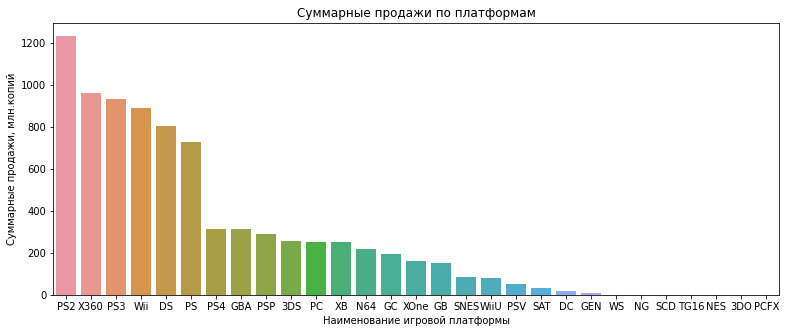

In [23]:
# сгруппируем данные по продажам в сводной таблице
platform = (
   games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales',ascending = False)
)

matplotlib.rcParams['figure.figsize'] = [13, 5] # указываем размер графика

# вызываем функцию barplot()
seaborn.barplot(x=platform.index, y=platform['total_sales'])
plt.title("Суммарные продажи по платформам")
plt.xlabel("Наименование игровой платформы")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

На графике четко видно шестерку лидеров платформ по проджам. Это - PS2, X360, PS3, Wii, DS, PS.

Построим график продаж видео игр на различных платформах в зависимости от года. Для начала отфильтруем только нужные нам платформы, затем посчитаем суммарные продажи по годам с помощью сводной таблицы и у получившегося DataFrame вызовем функцию plot. 

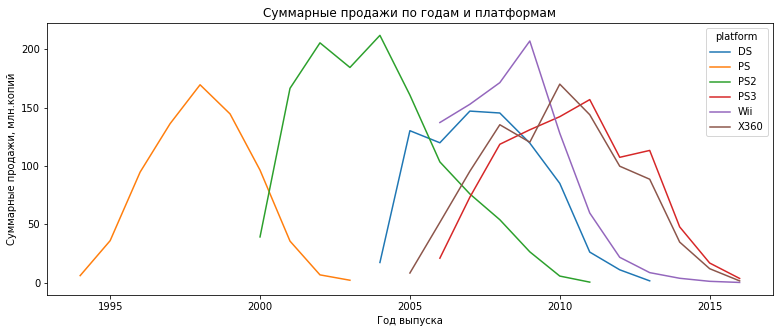

In [24]:
# сохраним в переменную наименования платформ с максимальными продажами
top = pd.Series(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])

# сгруппируем данные по годам в сводной таблице
top_platform = (
   games
    .query('platform in @top')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot()
)

plt.title("Суммарные продажи по годам и платформам")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

На графике четко видно, что у каждой платформы есть период жизни и составляет он около 7 лет.

In [25]:
# Комментарий ревьюера
# temp = games.copy() используем ранее сохраненный датасет со всеми данными 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Определим актуальный период жизни платформы.

Выберим минимальный порог продаж - например 50 млн копий. Для каждой платформы найдем число лет, когда суммарные продаж превышают этот порог. Потом посчитаем среднее число таких лет - это и будет среднее время жизни платформы. Актуальный период составит примерно половину этого времени потому, что половину жизненного цикла платформы растут, а вторую половину - падают.

In [26]:
# используем фильтр и сводную таблицу
top_platform = (
   games
    .query('platform in @top') # фильтруем нашу таблицу только по топ платформам
    .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    .query('total_sales >= 35') # выбираем только те года объем продаж по которым более 35 млн
    .groupby(['platform'])  # группируем таблицу по платформам, 
    .count().mean()  # считаем количество лет жизни каждой платформы и находим среднее для всех платформ 
)     
actual = round(top_platform/2)
print('Актуальный период жизни: ', actual)

Актуальный период жизни:  total_sales    4.0
dtype: float64


**Вывод:** актуальный период жизни платформы составляет около 4 лет. То есть на основе данных за четыре последних года можно сделать прогноз об объеме продаж на следующий год.

In [27]:
# Создадим датафрэйм с данными за актуальный период жизни платформ, для следующего анализа.
games_actual_period = games.query('year_of_release >= 2013')
print(games_actual_period.shape)
games_actual_period.head(10)

(2233, 12)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


В этой таблице только актуальные данные за последние 4 года, количество строк - 2233. В расчетах учитываем и 2013 год, так как за 2016 год данные не полные. Будем использовать эти данные для последующего анализа, чтобы сделать реалистичные прогнозы на 2017 год. 

#### Определим платформы которые лидируют по продажам в последние 4 года.

Определим какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ. Отфильтруем датафрэйм по актуальному периоду жизни больше или равно 2013 году, данные за предыдущие годы не учитываем. Для начала определим лидеров в отрасли.

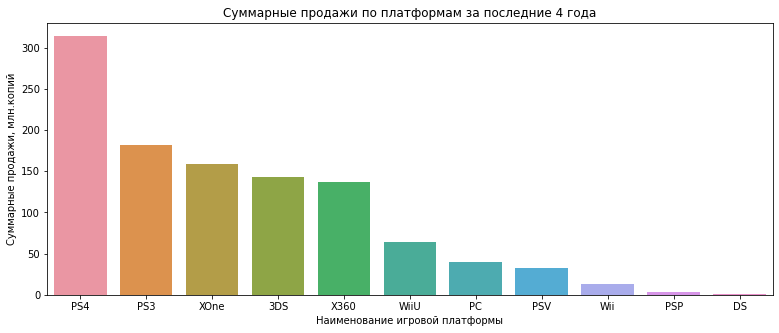

In [28]:
# сгруппируем данные по продажам в сводной таблице
actual_platform = (
   games_actual_period
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales',ascending = False)
)

matplotlib.rcParams['figure.figsize'] = [13, 5] # указываем размер графика

# вызываем функцию barplot()
seaborn.barplot(x=actual_platform.index, y=actual_platform['total_sales'])
plt.title("Суммарные продажи по платформам за последние 4 года")
plt.xlabel("Наименование игровой платформы")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

В явных лидерах по продажам 5 платформ, но с объемом продаж более 50 млн наблюдаем 6 платформ. Вот эти платформы:
PS4, PS3, XOne, 3DS, X360, WiiU. 

Посмотрим динамику продаж по каждой платформе. 

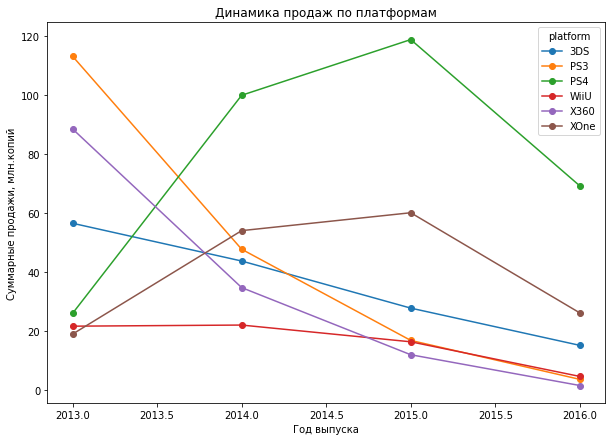

In [29]:
actual = pd.Series(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU'])
#games_actual = games.query('year_of_release == [2013,2014,2015] and platform in @actual')

# сгруппируем данные по продажам в сводной таблице
actual_platform=(
    games_actual_period
    .query('platform in @actual')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(style='o-', figsize=[10,7], title='Динамика продаж по платформам')
)
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

 - Платформы на которых наблюдается спад продаж: PS3, X360, 3DS, WiiU.
 - Платформы с ростом продаж: PS4, XOne. Всего две платформы с потенциальным ростом продаж, по остальным идет спад.
 - По всем платформам виден спад с 2015 по 2016 год, это объясняется тем, что данные за 2016 год не полные, и учтены не все продажи за 2016 год.

#### Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам.

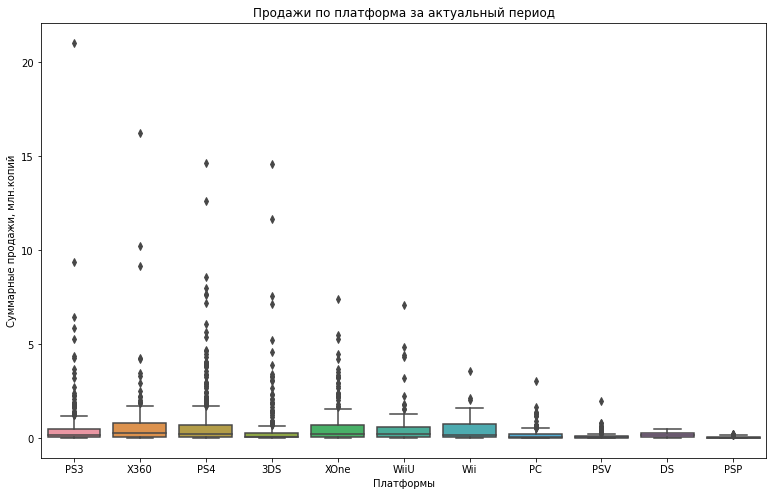

In [30]:
matplotlib.rcParams['figure.figsize'] = [13, 8] # указываем размер графика
# вызовем функцию boxplot
seaborn.boxplot(y="total_sales", x="platform", data=games_actual_period)
#plt.ylim(0, 3) 
plt.title('Продажи по платформа за актуальный период')
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

Больше всего выбросов имеют платформы `PS3`, `PS4`, `3DS`, `XOne` - значит на этих платформах выстреливали игры по которым продано более 2 млн. копий. Чем больше выбросов, тем более вероятно, что платформа может выпустить супер-популярную игру.

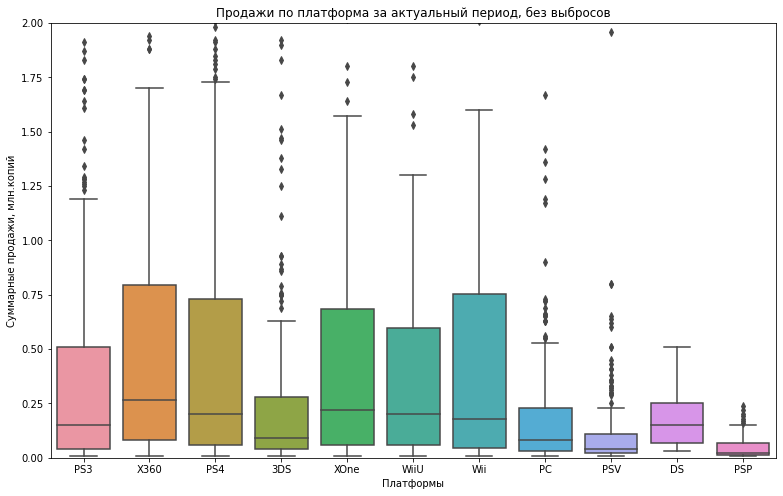

In [31]:
matplotlib.rcParams['figure.figsize'] = [13, 8] # указываем размер графика
# вызовем функцию boxplot
seaborn.boxplot(y="total_sales", x="platform", data=games_actual_period)
#games_actual.sort_values(by = 'total_sales',ascending = False).head()
plt.ylim(0, 2) 
plt.title('Продажи по платформа за актуальный период, без выбросов')
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

 - Наиболее перспективные платформы  `PS4`, `X360`, `XOne`, `WiiU`, `Wii`.
 - Самая высокая медиана у платформы `PS4`, то есть 50% всех выпущенных игр с 2013 года имело уровень продаж до 250 тыс проданных копий. На остальных четырех платформах медиана на уровне 200 тыс. копий. 
 - Объем этих ящиков так же примерно одинаков: нижняя граница (25%) - 100 тыс копий, верхняя граница (75%) у платформ  `X360`, `Wii` и `PS4` - около 750 тыс копий за игру. 
 - Следующий довольно крупный игрок платформа `PS3` - 50% всех выпущенных игр с 2013 года имело уровень продаж до 200 тыс проданных копий. 75% всех проданных игр на уровне 500 тыс. копий.
 - Самые низкие продажы на платформах `3DS`, `PC`, `PSV`, `DS`, `PSP` - верхняя граница (75%) у этих платформ - не более 250 тыс копий за игру.

#### Влияние отзывов критиков и пользователей на объемы продаж, на примере популярной платформы.


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Так как данные о рейтингах не полные, то для начала посмотрим по какой платформе больше всего рецензий.

In [32]:
# сгруппируем данные по платформам и посчитаем количество рецензий по каждой
games_actual_period.groupby(['platform']).count().sort_values(by = 'critic_score',ascending = False).head(6)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
PS4,392,392,392,392,392,392,392,252,257,392,392
XOne,247,247,247,247,247,247,247,169,182,247,247
PC,189,189,189,189,189,189,189,149,155,189,189
PS3,345,345,345,345,345,345,345,121,186,345,345
X360,186,186,186,186,186,186,186,81,143,186,186
PSV,358,358,358,358,358,358,358,77,99,358,358


In [33]:
# Комментарий ревьюера
games.year_of_release.min()

1994

По количеству рецензий лидирует платформа `PS4`, это и не удивительно, так как именно на этой платформе было больше всего продано копий игр. Дальнейший анализ проведем на примере этой платформы.

#### Влияние отзывов критиков пользователей на объемы продаж, на примере популярной платформы `PS4`.

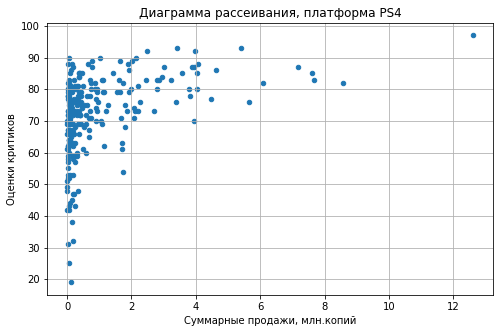

Коэффициент корреляции:  0.40656790206178095


In [34]:
# отфильтруем исходный датафрэйм по платформе PS4
top_platform = games_actual_period.query('platform == "PS4" and critic_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа PS4')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки критиков")
plt.show()

print('Коэффициент корреляции: ', top_platform['critic_score'].corr(top_platform['total_sales']))

Есть незначительная прямая зависимость, не очень сильная так как коэффициент корреляции составляет всего 0,4. Можно говорить о прямой зависимости: чем выше оценки критиков тем больше продаж. 

Посмотрим, как влияют на продажи внутри одной популярной платформы `PS2` отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

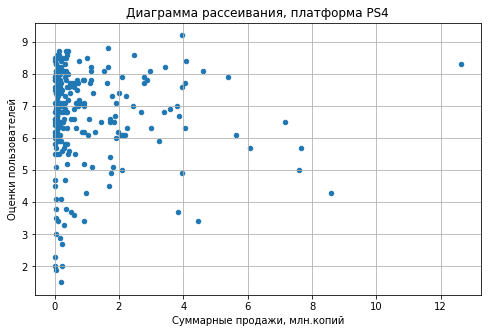

Коэффициент корреляции:  -0.031957110204556376


In [35]:
# отфильтруем исходный датафрэйм по платформе PS4
top_platform =  games_actual_period.query('platform == "PS4" and user_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа PS4')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки пользователей")
plt.show()

print('Коэффициент корреляции: ', top_platform['user_score'].corr(top_platform['total_sales']))

Коэффициент корреляции равный -0.03 не подтверждает зависимоть между оценками пользователей и продажами игр.

**Вывод:** На продажи в большей степени влияют отзывы критиков, чем отзывы пользователй. Зависимость прямая - чем выше оценка критиков тем выше продажи.

#### Посмотрим сохраняется ли эта зависимость на других платформах.

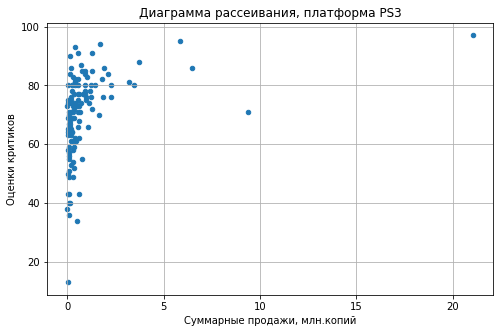

Коэффициент корреляции:  0.3342853393371919


In [36]:
# создадим список с актуальными платформами
platforn_list = ['PS3', 'XOne', '3DS', 'X360']

# отфильтруем исходный датафрэйм по платформе PS3
top_platform = games_actual_period.query('platform == "PS3" and critic_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа PS3')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки критиков")
plt.show()

print('Коэффициент корреляции: ', top_platform['critic_score'].corr(top_platform['total_sales']))

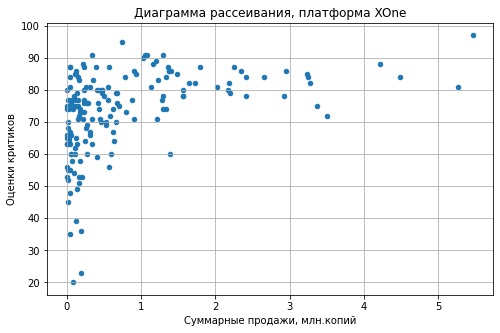

Коэффициент корреляции:  0.4169983280084017


In [37]:
# отфильтруем исходный датафрэйм по платформе PS3
top_platform = games_actual_period.query('platform == "XOne" and critic_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа XOne')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки критиков")
plt.show()

print('Коэффициент корреляции: ', top_platform['critic_score'].corr(top_platform['total_sales']))

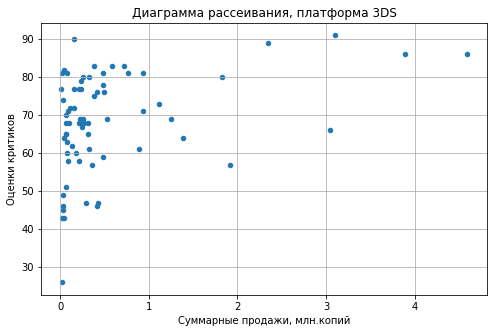

Коэффициент корреляции:  0.3570566142288103


In [38]:
# отфильтруем исходный датафрэйм по платформе PS3
top_platform = games_actual_period.query('platform == "3DS" and critic_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа 3DS')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки критиков")
plt.show()

print('Коэффициент корреляции: ', top_platform['critic_score'].corr(top_platform['total_sales']))

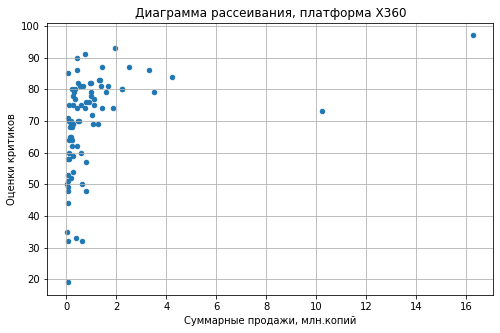

Коэффициент корреляции:  0.3503445460228664


In [39]:
# отфильтруем исходный датафрэйм по платформе PS3
top_platform = games_actual_period.query('platform == "X360" and critic_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа X360')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки критиков")
plt.show()

print('Коэффициент корреляции: ', top_platform['critic_score'].corr(top_platform['total_sales']))

Похожая зависимость сохраняется и на других платформах. Коэффициенты корреляции от 0,35 до 0,42. Прямая не сильная зависимоть. Чем выше отзывы критиков, тем выше продажи.

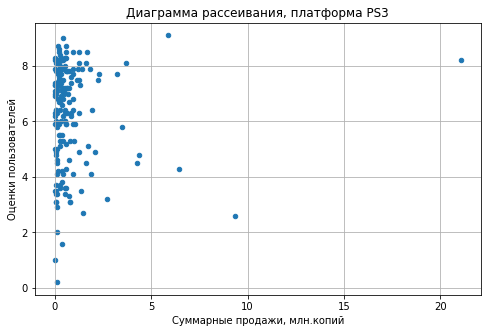

Коэффициент корреляции:  0.0023944027357566925


In [40]:
# создадим список с актуальными платформами
platforn_list = ['PS3', 'XOne', '3DS', 'X360']

# отфильтруем исходный датафрэйм по платформе
top_platform =  games_actual_period.query('platform == "PS3" and user_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа PS3')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки пользователей")
plt.show()

print('Коэффициент корреляции: ', top_platform['user_score'].corr(top_platform['total_sales']))

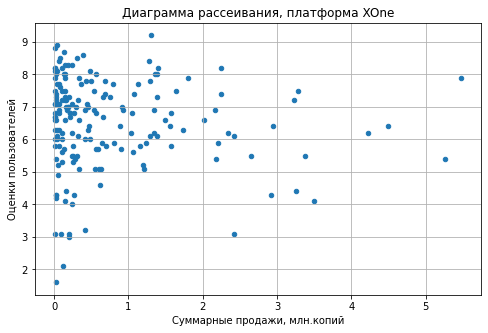

Коэффициент корреляции:  -0.06892505328279414


In [41]:
# отфильтруем исходный датафрэйм по платформе
top_platform =  games_actual_period.query('platform == "XOne" and user_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа XOne')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки пользователей")
plt.show()

print('Коэффициент корреляции: ', top_platform['user_score'].corr(top_platform['total_sales']))

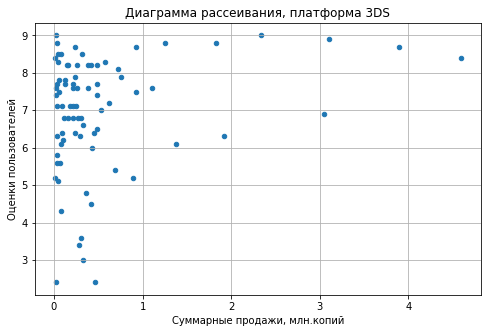

Коэффициент корреляции:  0.24150411773563016


In [42]:
# отфильтруем исходный датафрэйм по платформе
top_platform =  games_actual_period.query('platform == "3DS" and user_score >= 0')

# построим график
matplotlib.rcParams['figure.figsize'] = [8, 5] # указываем размер графика
top_platform.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.title('Диаграмма рассеивания, платформа 3DS')
plt.xlabel("Суммарные продажи, млн.копий")
plt.ylabel("Оценки пользователей")
plt.show()

print('Коэффициент корреляции: ', top_platform['user_score'].corr(top_platform['total_sales']))

Похожая зависимость объема продажа от пользовательского рейтинга сохраняется и на других популярных платформах 'PS3', 'XOne', '3DS'. Коэффициенты корреляции от -0,07 до 0,24 говорят об отсутствии прямой зависимости между объемами продаж и отзывами пользователей.

Расчет по Платформе 3DS


user_score     0.241504
total_sales    1.000000
Name: total_sales, dtype: float64

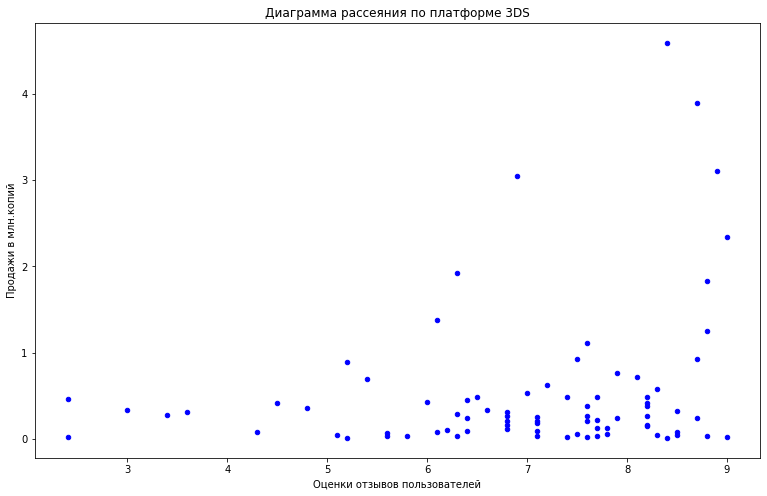

critic_score    0.357057
total_sales     1.000000
Name: total_sales, dtype: float64

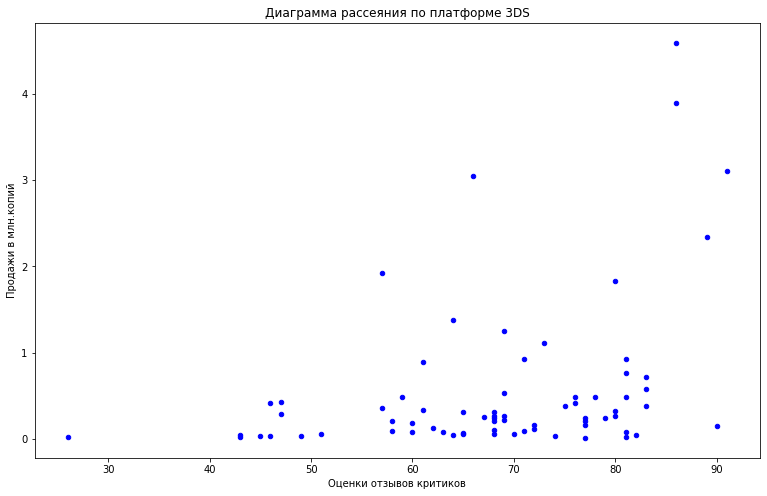

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score    -0.093842
total_sales    1.000000
Name: total_sales, dtype: float64

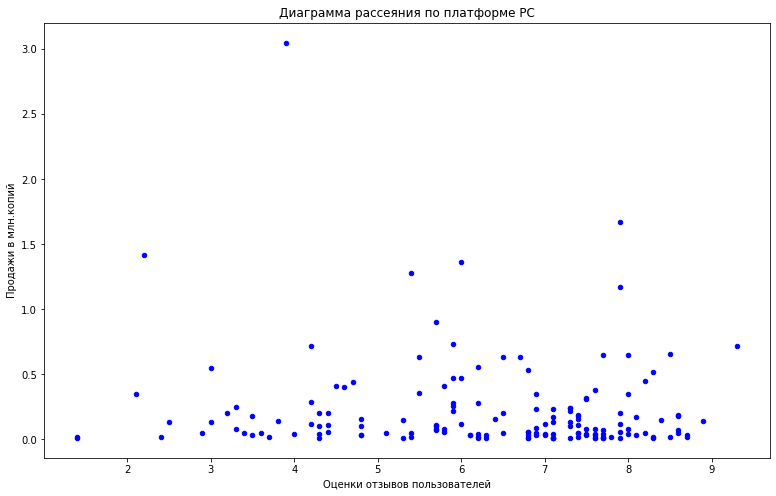

critic_score    0.19603
total_sales     1.00000
Name: total_sales, dtype: float64

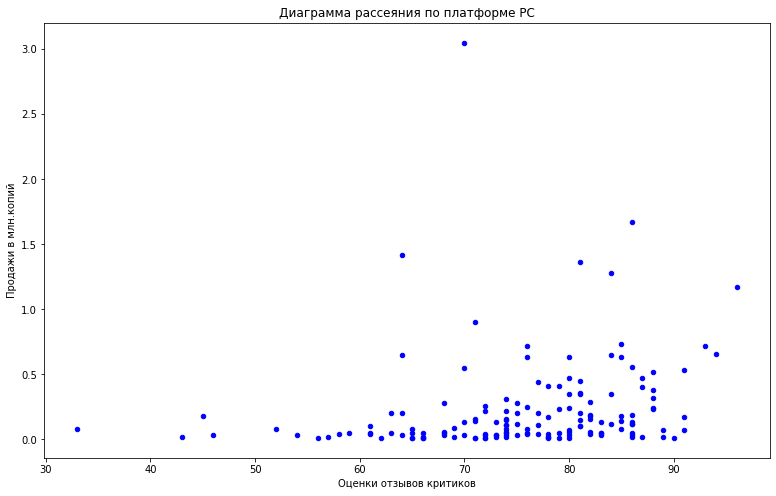

Расчет по Платформе PS3


user_score     0.002394
total_sales    1.000000
Name: total_sales, dtype: float64

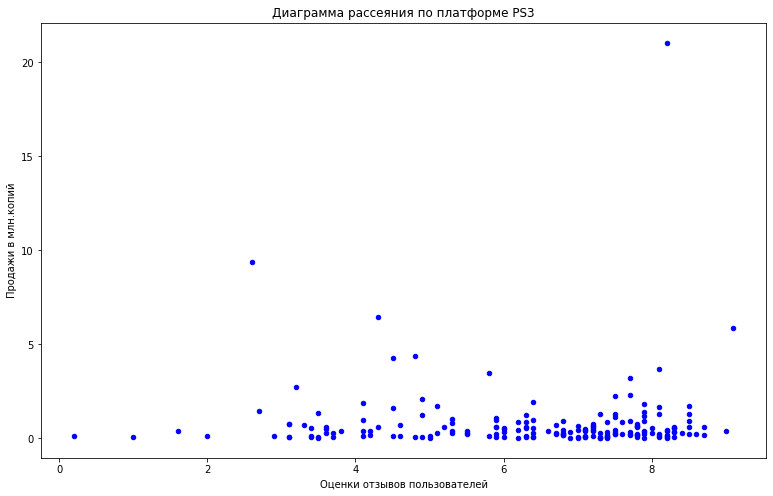

critic_score    0.334285
total_sales     1.000000
Name: total_sales, dtype: float64

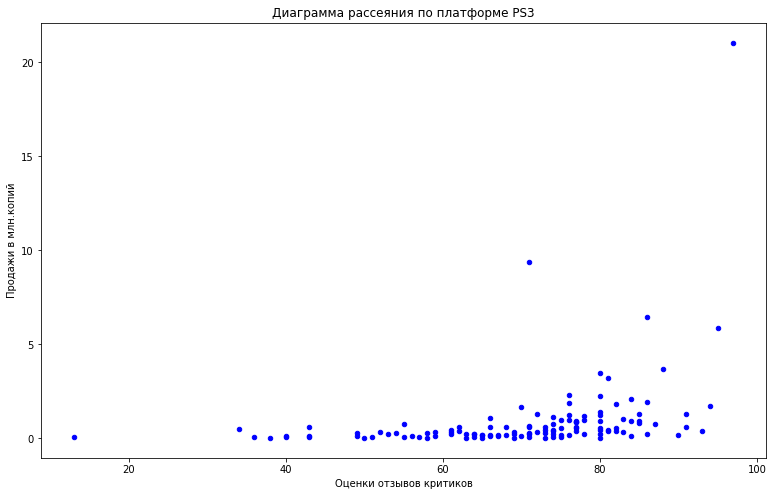

Расчет по Платформе PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

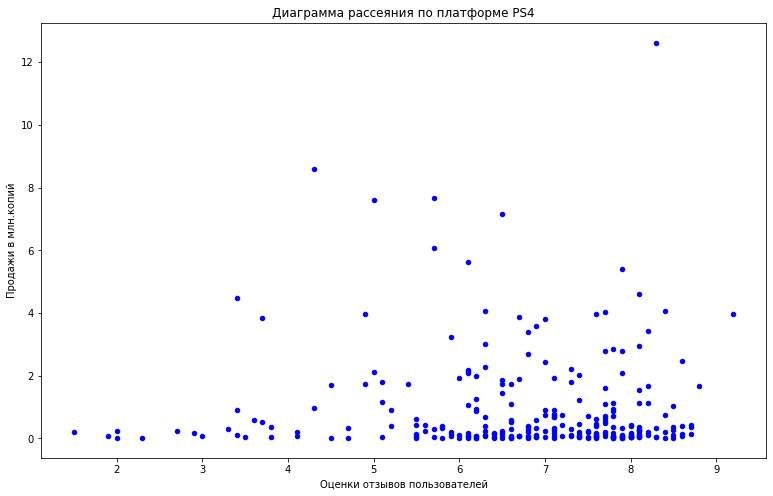

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

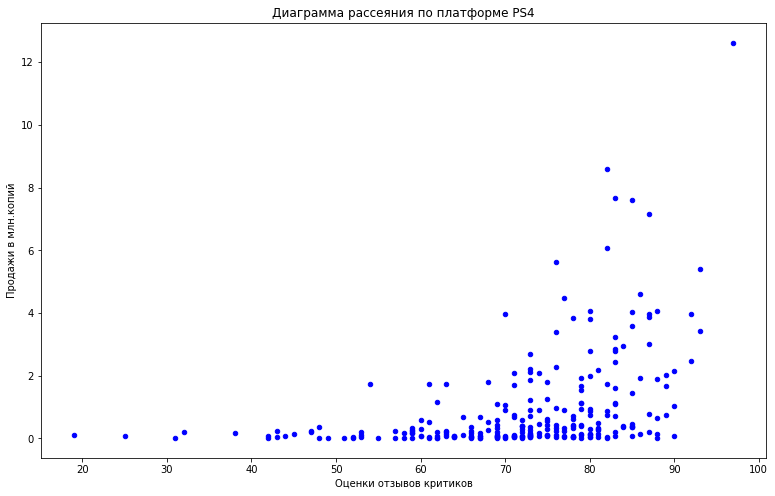

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score     0.000942
total_sales    1.000000
Name: total_sales, dtype: float64

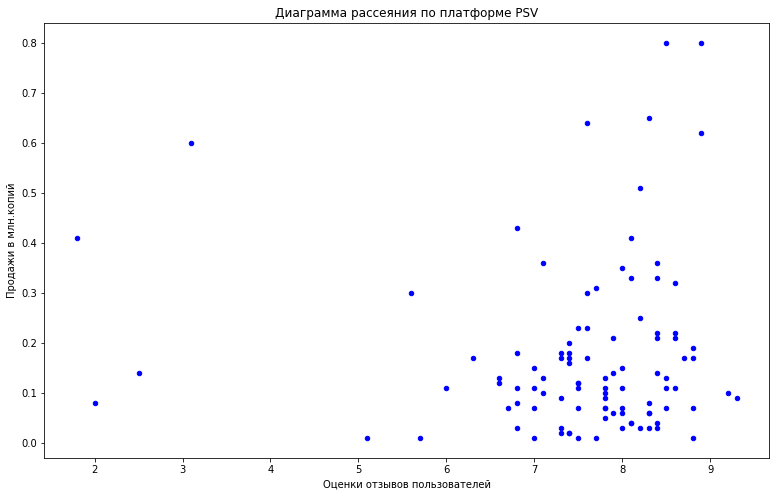

critic_score    0.254742
total_sales     1.000000
Name: total_sales, dtype: float64

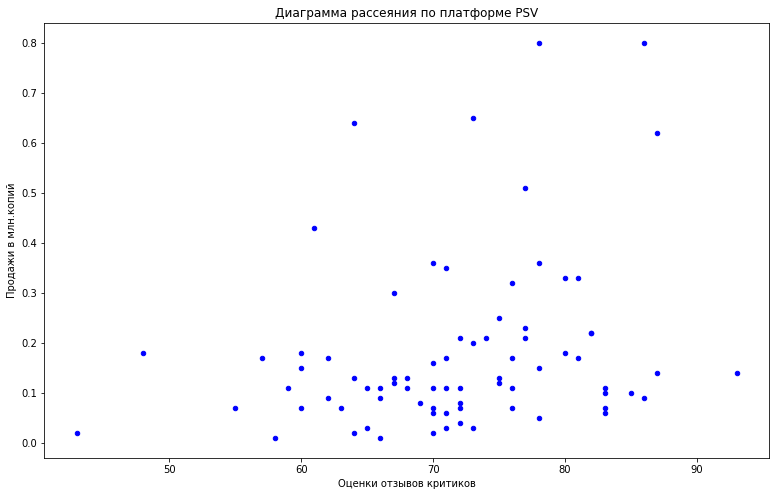

Расчет по Платформе Wii


user_score     0.682942
total_sales    1.000000
Name: total_sales, dtype: float64

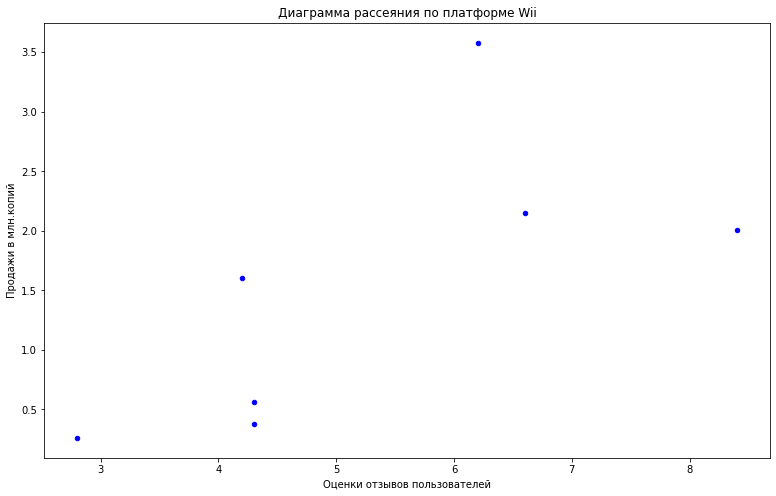

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.41933
total_sales    1.00000
Name: total_sales, dtype: float64

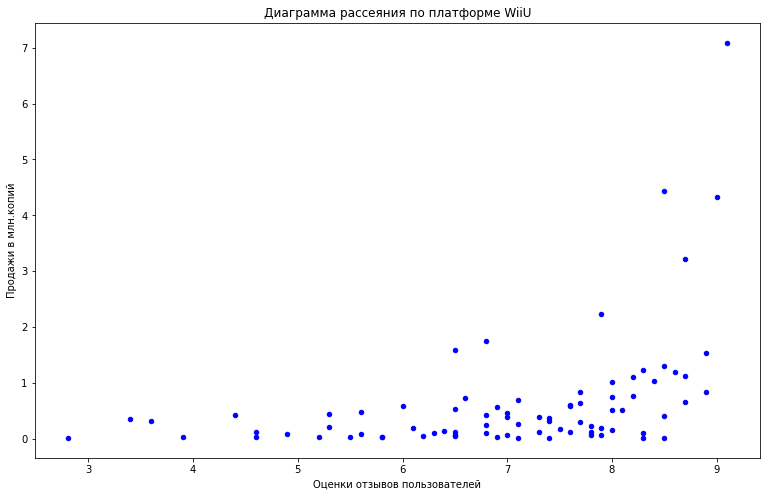

critic_score    0.376415
total_sales     1.000000
Name: total_sales, dtype: float64

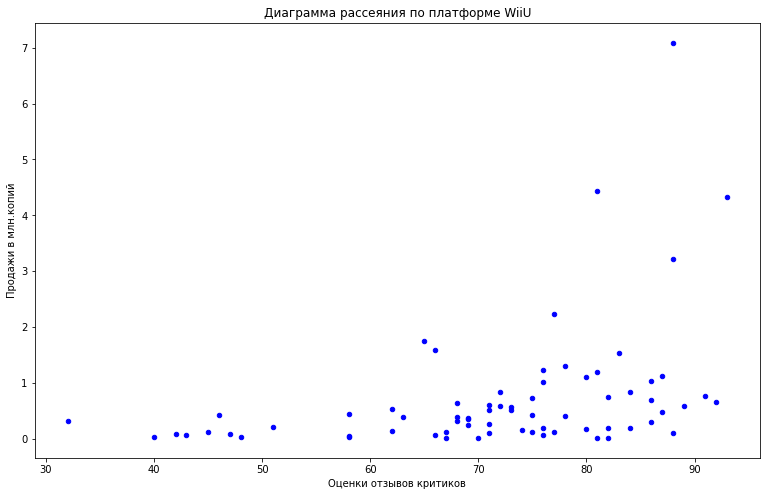

Расчет по Платформе X360


user_score    -0.011742
total_sales    1.000000
Name: total_sales, dtype: float64

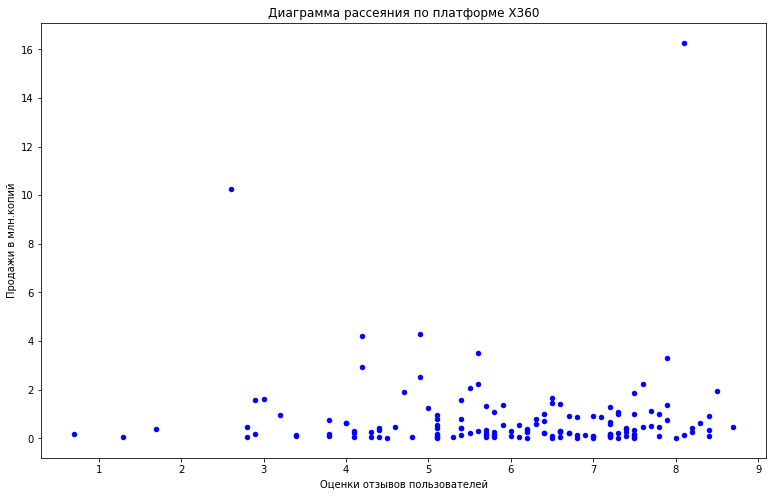

critic_score    0.350345
total_sales     1.000000
Name: total_sales, dtype: float64

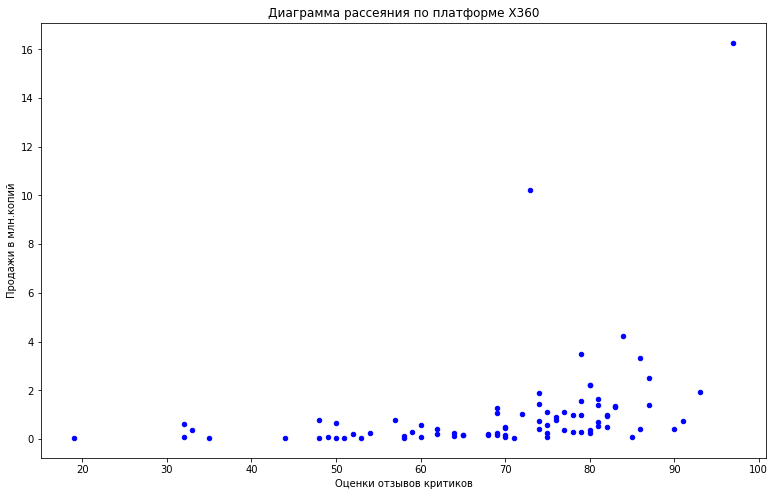

Расчет по Платформе XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

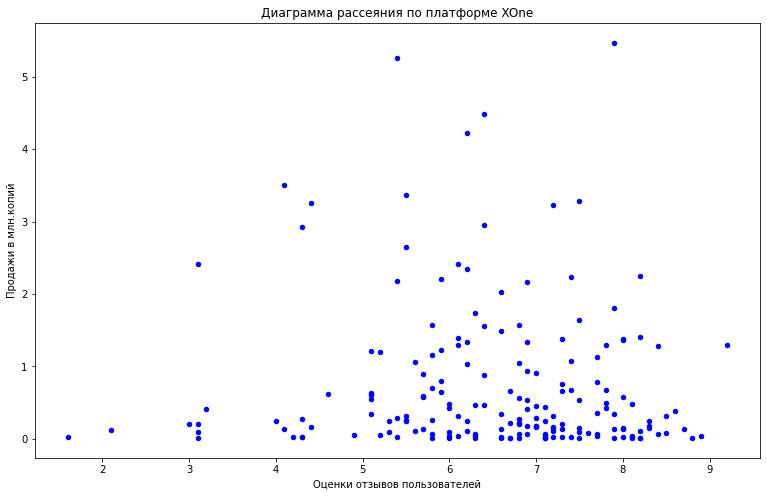

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

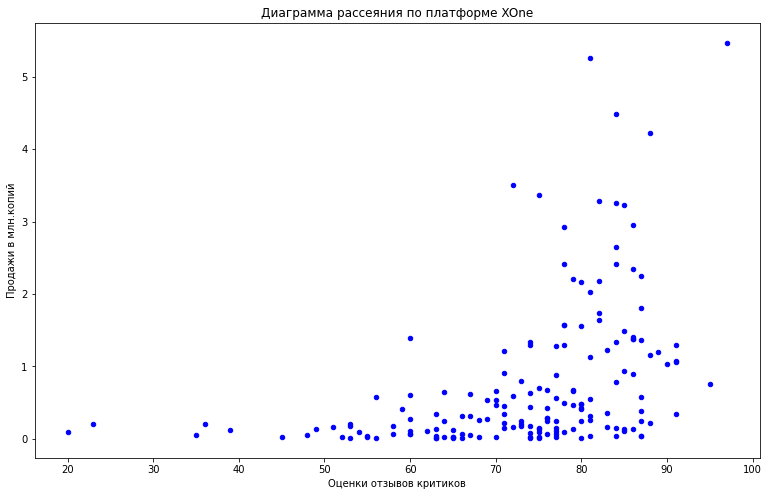

In [50]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
df_sc, y = games_actual_period.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

**Вывод:** Похожая зависимость сохраняется и на других популярных платформах 'PS3', 'XOne', '3DS'.  Успех игры в большей степени зависит от оценок критиков, чем от пользователей. 

#### Посмотрим на распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

              name
genre             
Action         766
Role-Playing   292
Adventure      245
Sports         214
Shooter        187
Misc           155
Racing          85
Fighting        80
Platform        74
Simulation      62
Strategy        56
Puzzle          17


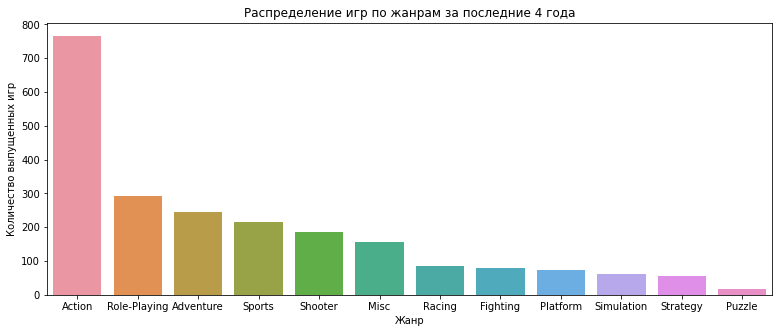

In [43]:
# сгруппируем игры по жанрам в сводной таблице
genre = (
   games_actual_period
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by = 'name',ascending = False)
)
print(genre)

matplotlib.rcParams['figure.figsize'] = [13, 5] # указываем размер графика

# вызываем функцию barplot()
seaborn.barplot(x=genre.index, y=genre['name'])
plt.title("Распределение игр по жанрам за последние 4 года")
plt.xlabel("Жанр")
plt.ylabel("Количество выпущенных игр")
plt.show()

**Вывод:** Больше всего игр выпущенно следующих жанров: `Action`, `Role-Playing`, `Adventure`, `Sports`, `Shooter`, `Misc`.

- Жанр `Action` в явных лидерах - выпущенно более 766 игр этого жанра, за 4 года;
- В следующих топовых жанрах выпущенно от 155 до 292 игр. 
- В оставшихся категориях выпущено менее 100 игр, по каждому жанру.

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Name: total_sales, dtype: float64


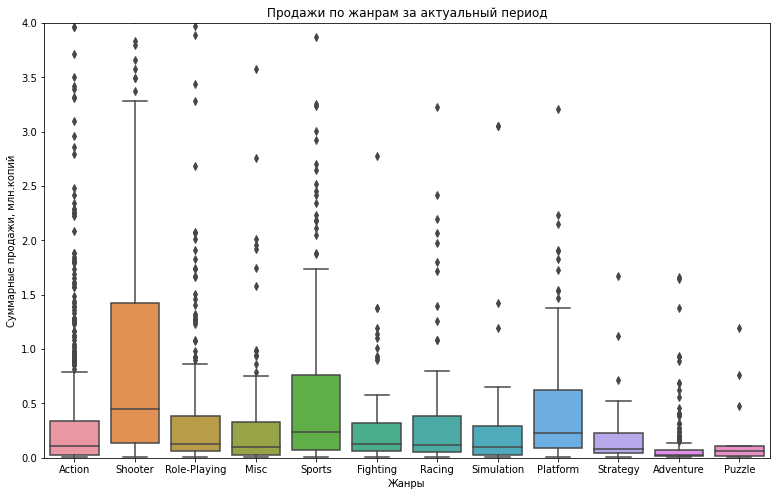

In [44]:
print(games_actual_period.groupby('genre')['total_sales'].median().sort_values(ascending = False).head(7))
matplotlib.rcParams['figure.figsize'] = [13, 8] # указываем размер графика
# вызовем функцию boxplot
seaborn.boxplot(y="total_sales", x="genre", data=games_actual_period)
plt.ylim(0, 4) 
plt.title('Продажи по жанрам за актуальный период')
plt.xlabel("Жанры")
plt.ylabel("Суммарные продажи, млн.копий")
plt.show()

**Вывод:** В топе по продажам следующие жанры: `Shooter`, `Sports`, `Platform`, `Role-plaing`, `Fighting`.
Наиболее объемные "ящики" у жанров 
Самая высокая медиана у жанра `Shooter`, то есть стабильно 50% всех выпущенных игр с 2013 года имело уровень продаж до 450 тыс проданных копий. 25% выпущенных игр имело уровень продаж около 200 тыс копий. Верхняя граница - 75% до 1,45 млн копий. Похоже это самый стабильный жанр, видео игры на котором приносят устойчивый доход.

Следующий по прибыльности жанр - `Sports`. Медиана на уровне -240 тыс. копий. Межквартильный размах в районе: 100 - 800 тыс. копий.

На третьем месте - жанр: `Platform`: медиана - на уровне 225 тыс. копий. Межквартильный размах меньше и в районе: 100 - 600 тыс. копий.

В жанрах `Role-plaing` и `Fighting` медиана еще ниже и составляет: около 125 тыс. копий. 

Отдельно хочется сказать про жанр `Action` - медиана на уровне 110 тыс. копий. То есть 50 % всех игр имело уровень продаж не более 110 тыс. копий. При этом в этом жанре больше всего выбросов. Если игра "выстрелит", то может принести очень высокие продажи.

#### Вывод исследовательский анализ.

- статистика по играм с 1980 года, с 1994 года количество выпускаемых игр начинает расти. Больше всего игр вышло в 2008-2009 годах, после чего количество выпусков начало падать. До 1995 в год выпускалось не более 200 игр, по сравнению с годами после. Примем за нижнюю границу 1994 год, остальные данные отбросили. 

- Шесть платформ  лидирующих по проджам. Это - PS2, X360, PS3, Wii, DS, PS.

- Каждая платформа имеет свой жизненый цикл, сначала продажи по ней растут, затем падают. Среди топ платформ мы отобрали года, в которых продажи были более 50 млн. копий. Нашли средний жизненый цикл среди этих платформ и разделили его на два. Получился **актуальный период жизни платформы** равный 3 годам.

**Продажи по платформам**

    Наиболее перспективные платформы PS4, X360, XOne, WiiU, Wii.
    Самая высокая медиана у платформы PS4, то есть 50% всех выпущенных игр с 2013 года имело уровень продаж до 250 тыс проданных копий. На остальных четырех платформах медиана на уровне 200 тыс. копий.
    Объем этих ящиков так же примерно одинаков: нижняя граница (25%) - 100 тыс копий, верхняя граница (75%) у платформ X360, Wii и PS4 - около 750 тыс копий за игру.
    Следующий довольно крупный игрок платформа PS3 - 50% всех выпущенных игр с 2013 года имело уровень продаж до 200 тыс проданных копий. 75% всех проданных игр на уровне 500 тыс. копий.
    Самые низкие продажы на платформах 3DS, PC, PSV, DS, PSP - верхняя граница (75%) у этих платформ - не более 250 тыс копий за игру.


**Оценки пользователей и критиков**
- Больше всего отзывов на игровую платформу `PS4`. На продажи в большей степени влияют отзывы критиков, чем отзывы пользователй. Похожая зависимость сохраняется и на других популярных платформах 'PS3', 'XOne', '3DS'. Успех игры в большей степени зависит от оценок критиков, чем от пользователей. Зависимоть между оценками пользователей и уровнем продаж не установлена.

**Популярные жанры видео игр**

- В топе по продажам следующие жанры: Shooter, Sports, Platform, Role-plaing, Fighting. Самая высокая медиана у жанра Shooter, то есть стабильно 50% всех выпущенных игр с 2013 года имело уровень продаж до 450 тыс проданных копий. 25% выпущенных игр имело уровень продаж около 200 тыс копий. Верхняя граница - 75% до 1,45 млн копий. Похоже это самый стабильный жанр, видео игры на котором приносят устойчивый доход.

- Следующий по прибыльности жанр - Sports. Медиана на уровне -240 тыс. копий. Межквартильный размах в районе: 100 - 800 тыс. копий.

- На третьем месте - жанр: Platform: медиана - на уровне 225 тыс. копий. Межквартильный размах меньше и в районе: 100 - 600 тыс. копий.

- В жанрах Role-plaing и Fighting медиана еще ниже и составляет: около 125 тыс. копий.

- Отдельно хочется сказать про жанр Action - медиана на уровне 110 тыс. копий. То есть 50 % всех игр имело уровень продаж не более 110 тыс. копий. При этом в этом жанре больше всего выбросов. Если игра "выстрелит", то может принести очень высокие продажи.

## Шаг. Портрет пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишим различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы по регионам - Северная Америка, Европа и Япония.

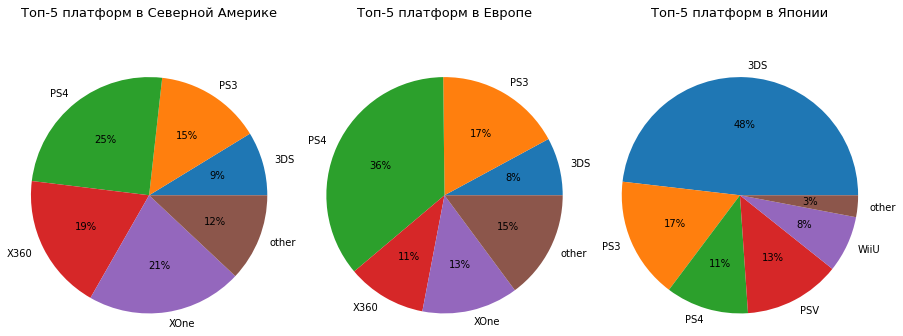

In [45]:
# создаем круговые диаграммы обзора рынка платформ для каждого региона
region = ['na_sales', 'eu_sales', 'jp_sales']
reg_name = ['Северной Америке', 'Европе','Японии']
# параметры графиков
fig,axs = plt.subplots(1, 3, figsize=(15,10))
for i in range (len(region)):
    region_df = games_actual_period.groupby('platform').agg({region[i]:'sum'}).reset_index()
    region_df['share']=region_df[region[i]]/region_df[region[i]].sum()#найдем доли продаж по каждой платформе
    region_df.loc[region_df['share']<=0.07,'platform']='other'# присвоим отдельным платформам с долей рынка меньше 7% статус - другие
    region_df=region_df.groupby('platform').agg({region[i]:'sum'}).reset_index()# сгруппируем остальные платформы и топ-5
    # графики на основе получившейся таблицы
    plt.subplot(1,3,i+1)
    plt.pie(region_df[region[i]], labels=region_df['platform'], autopct='%.0f%%', radius=1.2,)
    plt. title('Топ-5 платформ в '+reg_name[i], y=1.2, fontsize=13)
    #print(region_df.sort_values(by=region[i], ascending = False))
plt.show()

**Вывод:** 
- В Северной Америке в топе платформы: `PS4` - 25%, `XOne` - 21% рынка, `X360` - 19%, `PS3` - 15%, `3DS` - 9%, на остальные платформы приходится около 12%. Это немного отличается от общего распределения продаж, так как в этом регионе на первом месте платформа `XOne`.
- В Европе в топе платформы: `PS4` - занимает практически 36% рынка, на втором месте `PS3` - 17%, а `XOne` только на третьем месте, в отличие от Северной Америки, и занимает всего 13% рынка, , `X360` - 11%, , `3DS` - 8%;на остальные платформы приходится около 15%. 
- В Японии в топе платформы: `3DS`- занимает практически 48% рынка, на втором месте `PS3` - 17%, `PSV` на третьем месте - 13% рынка, `PS4` - 11%, `WiiU` - 8%, на остальные платформы приходится около 3%. Распределение топ-5 платформ значительно отличается от общего распределения продаж по платформам и от регионов Северная Америка и Европа. Половину рынка занимает платформа `3DS` - в регионах Северная Америка и Европа она на последнем месте и занимает не более 10% рынка. Возможно эта платформа разработа специально для рынка Японии.

#### Самые популярные жанры в регионах - Северная Америка, Европа и Япония.¶

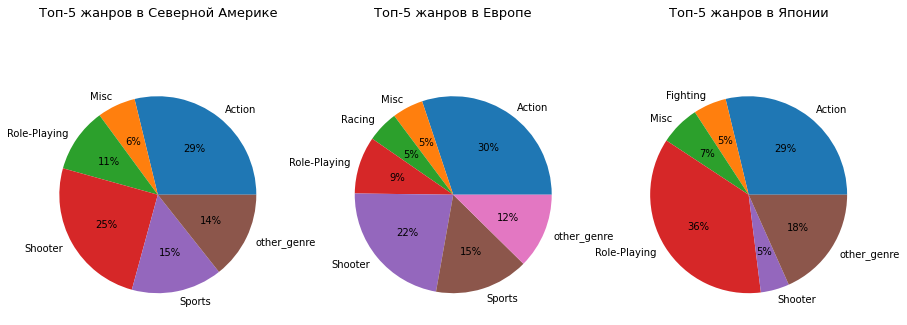

In [46]:
# параметры графиков
fig,axs = plt.subplots(1, 3, figsize=(15,10))
for i in range (len(region)):
    genre_df = games_actual_period.groupby('genre').agg({region[i]:'sum'}).reset_index().sort_values(by=region[i], ascending = False)#
    genre_df['share']=genre_df[region[i]]/genre_df[region[i]].sum()#найдем доли продаж по каждой платформе
    genre_df.loc[genre_df['share']<=0.046,'genre']='other_genre'# присвоим отдельным платформам с долей рынка меньше 7% статус - другие
    genre_df=genre_df.groupby('genre').agg({region[i]:'sum'}).reset_index()#.sort_values(by=region[i], ascending = False)## сгруппируем остальные платформы и топ-5
    # графики на основе получившейся таблицы
    plt.subplot(1,3,i+1)
    plt.pie(genre_df[region[i]], labels=genre_df['genre'], autopct='%.0f%%', radius=1,)
    plt. title('Топ-5 жанров в '+reg_name[i], y=1.2, fontsize=13)
    #print(genre_df)

**Вывод:** 
- В Северной Америке больше всего игр выпущенно следующих жанров: Action (29%), Shooter(25%), Sports(15%), Role-Playing(11%), Misc(6%), на остальные жанры приходится около 14% рынка. Есть незначительное различие с общим распределением.
- В Европе больше всего игр выпущенно следующих жанров: Action (30%), Shooter(22%), Sports(15%), Role-Playing(9%), Misc и Racung (по 5%). А вот жанры в Европе предпочитают такие же как и в Северной Америке. И доли рынка среди топ-5 примерно одинаковые.
- В Японии больше всего игр выпущенно следующих жанров: Role-Playing(36%), Action (29%), Misc(7%), Fighting(5%), Shooter(5%), на остальные жанры приходится около 18% рынка. Распределение топ-5 жанров значительно отличается от Европы и Северной Америке. В Японии на первое место и с большим отрывом выходят "ролевые игры" и занимают 36% рынка, а вот игры в жанре "экшн" только на втором месте и ханимают - 29% рынка. Здесь только два крупных "игрока", остальные жанры занимают не более 7% рынка.


#### Зависимоть объема продаж от возрастного рейтинга игры.

    rating  na_sales
0        M    165.21
1  unknown     89.42
2        E     79.05
3     E10+     54.24
4        T     49.79
    rating  eu_sales
0        M    145.32
1        E     83.36
2  unknown     78.91
3     E10+     42.69
4        T     41.95
    rating  jp_sales
0  unknown     85.05
1        T     20.59
2        E     15.14
3        M     14.11
4     E10+      5.89


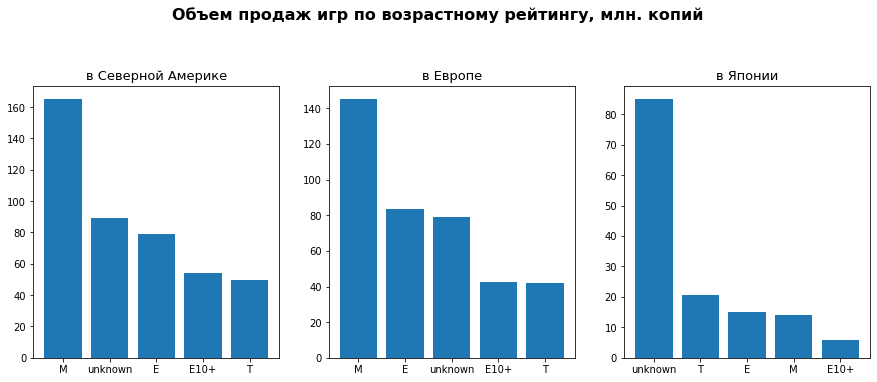

In [47]:
# параметры графиков
fig,axs = plt.subplots(1, 3, figsize=(15,5))
for i in range (len(region)):
    rating_df = games_actual_period.groupby('rating').agg({region[i]:'sum'}).sort_values(by=region[i], ascending = False).reset_index()#
    print(rating_df)
    # графики на основе получившейся таблицы
    plt.subplot(1,3,i+1)
    plt.bar(rating_df['rating'],rating_df[region[i]])
    plt. title('в '+reg_name[i], y=1, fontsize=13)
# общее название графика
fig. suptitle( 'Объем продаж игр по возрастному рейтингу, млн. копий', fontsize=16, y=1.1, weight='demi')
plt.show()

**Вывод:**
Наблюдается определенная зависимость объема продажа от возрастного рейтинга игры. Если проигнорировать игры у которых не указан возрастной рейтинг (89 млн. копий) то получается следующая картина **В Северной Америке**:

Больше всего игр продано с рейтингом M - 165 млн.копий. На втором месте рейтинг E - 79 млн.копий. Третье и четвертое место у игр с рейтингом E10+ и T - 54 и 50 млн. копий соответственно. Можно сказать, что в топе игры охватывающие большую аудиторию - "старше 17 лет" и "для всех возрастов". Игры с рейтингом для более узкой аудитории "старше 10 лет" и "старше 13" имеют меньший объем продаж.

**В Европе**
Больше всего игр продано с рейтингом M - 145 млн.копий. На втором месте рейтинг E - 83 млн.копий. Третье и четвертое место у игр с рейтингом E10+ и T - 42 и 41 млн. копий соответственно. Можно сказать, что в топе игры охватывающие большую аудиторию - "старше 17 лет" и "для всех возрастов". Игры с рейтингом для более узкой аудитории "старше 10 лет" и "старше 13" имеют меньший объем продаж.

Картина с возрастным рейтингом очень похожа на Северную Америку, там распределение такое же.
Общий объем продаж в европе -392 млн. копий за период с 2013 года.

**В Японии**
Так как возрастной рейтинг ESRB разрабатвался для Северной Америки, то в Японии он практически не используется. 
По играм с известным возрастным рейтингом получается следующая картина: 21 млн. копий - игры с рейтингом T (Подходит для лиц старше 13 лет); 15 млн. копий - игры с рейтингом E (Подходит для всех возрастных категорий); 14 млн. копий - игры с рейтингом M (Подходит для лиц старше 17 лет); 6 млн. копий - игры с рейтингом E10+ (Подходит для детей старше 10 лет).

   Общий объем продаж в Японии - 140 млн. копий за период с 2013 года, более чем в два раза меньше чем в Северной Америке. 
    
Портрет игрока в Японии значительно отличается от Северной Америки и Европы, они предпочитают другие игровые платформы, жанры и чаще всего на играх не указывается возрастной рейтинг.

## Шаг. Проверка гипотез.

#### Равны ли средние пользовательские рейтинги платформ `Xbox One` и `PC`.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Следовательно нужно проверить гипотезу о равенстве средних двух генеральных совокупностей. Так как это две независимые генеральные совокупности, игры выпускаются на разные платформы и оценки пользователей для каждой платформы свои.

Проверим гипотезу о том, что средние пользовательские оценки на двух платформах не равны.

- Нулевая гипотеза: средние значения пользовательских оценок из двух групп равны.
- Альтернативная гипотеза: средние значения пользовательских оценок на двух платформах Xbox One и PC не равны.

Чтобы проверить такую гипотезу, нужно использовать метод ttest_ind() и передать данные из двух генеральных совокупностей.

In [48]:
# отфильтруем данные пользовательской оценки по двум платформам
xbox_one = games_actual_period.query('platform == "XOne" and user_score >=0')['user_score']
pc = games_actual_period.query('platform == "PC" and user_score >=0')['user_score']

# Расчитаем средние значения пользовательский оценок
print('Средняя пользовательская оценка на платформе xbox_one: ', xbox_one.mean())
print('Средняя пользовательская оценка на платформе PC: ', pc.mean())


alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox_one, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя пользовательская оценка на платформе xbox_one:  6.521428571428572
Средняя пользовательская оценка на платформе PC:  6.2696774193548395
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (0.1476), больше заданного уровня значимости, поэтому нет получается отвергнуть нулевую гипотезу. Можно предположить, что средние пользовательские оценки за актуальный период на двух платформах очень похожи.

#### Сравним пользовательские оценки жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования»).

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Следовательно нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.  Так как это две независимые генеральные совокупности, игры выпускаются в разных жанрах и оценки пользователей для каждого жанра свои.

- Нулевая гипотеза: средние значения пользовательских оценок из двух групп равны.
- Альтернативная гипотеза: средние значения пользовательских оценок жанра `Action` и `Sports`, не равны.

Проверим нулевую гипотезу о равенстве разности средних нулю.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() данные с оценками пользователей.

In [49]:
# отфильтруем данные пользовательской оценки по двум платформам
action = games_actual_period.query('genre == "Action" and user_score >=0')['user_score']
sports = games_actual_period.query('genre == "Sports" and user_score >=0')['user_score']

# Расчитаем средние значения пользовательский оценок
print('Средняя пользовательская оценка  в жанре Action: ', action.mean())
print('Средняя пользовательская оценка в жанре Sports: ', sports.mean())


alpha = 0.005 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя пользовательская оценка  в жанре Action:  6.837532133676092
Средняя пользовательская оценка в жанре Sports:  5.238124999999999
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


  Полученное значение p-value (1.44*10^(-20)) ниже заданного уровня значимости, поэтому отвергаем нулевую гипотезу. Есть основания говорить, что средние пользовательские оценки игр жанра `Action` значительно отличаются от оценок в жанре `Sports`.

## Шаг. Общий вывод.

#### О данных.

В каждой строке таблицы — данные о выпущенной игре. Часть колонок описывает саму игру: название, платформа, год выпуска и жанр. В части колонок хранится информация о продажах на разных территориях. Последние колонки содержат информацию о рейтингах игры, в том числе возрастном. Данных достаточно для проверки гипотез и анализа. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

#### Предобработка данных.

В результате предобработки данных привели названия столбцов к нижнему регистру; удалили строки с пропусками в столбцах `name`, `year_of_release`, `genre`;  заменили пропущенные значения в столбце `rating` на значение `unknown`; изменили тип данных в столбцах `year_of_release`, `user_score`; добавили новый столбец с информацией о суммарных продажах по всем регионам.

#### Исследовательский анализ данных.

- статистика по играм с 1980 года, с 1994 года количество выпускаемых игр начинает расти. Больше всего игр вышло в 2008-2009 годах, после чего количество выпусков начало падать. До 1995 в год выпускалось не более 200 игр, по сравнению с годами после. Примем за нижнюю границу 1994 год, остальные данные отбросили. 

- В явных лидерах по продажам 6 платформ. Вот эти платформы: PS4, PS3, XOne, 3DS, X360, WiiU. Платформы с ростом продаж: PS4, XOne. Всего две платформы с потенциальным ростом продаж, по остальным идет спад. 

- Каждая платформа имеет свой жизненый цикл, сначала продажи по ней растут, затем падают. Среди топ платформ мы отобрали года, в которых продажи были более 35 млн. копий. Нашли средний жизненый цикл среди этих платформ и разделили его на два. Получился **актуальный период жизни платформы** равный 4 годам.

**Перспективные платформы.**

- Стоит обратить внимание в 2017 году на платформы `PS4` и `XOne`, так как по ним наблюдается рост продаж. И 50% игр выпущенных на этих платформах  имели уровень продаж до 250 и 200 тыс. копий соответственно.

- Так же стабильные продажи на платформах `X360`, `WiiU`, `Wii`. Но по ним наблюдается спад продаж, и в 2017 году возможно он будет еще ниже. 50% игр выпущенных на этих платформах  имели уровень продаж до 200 тыс. копий.

- Самые низкие продажы на платформах `3DS`, `PC`, `PSV`, `DS`, `PSP` - верхняя граница (75%) у этих платформ - не более 250 тыс копий за игру.

**Влияние рейтингов на продажи:**
- Стоит обратить внимаение на игры с высокими оценками критиков, так как они юольше влияют на продажи, чем отзывы пользователей. Больше всего отзывов на игровую платформу `PS4`. Похожая зависимость сохраняется и на других популярных платформах `PS3`, `XOne`, `3DS`. Зависимоть между оценками пользователей и уровнем продаж не установлена.

**В каких жанрах выпускаются игры и как они влияют на продажи:**
- В топе по продажам следующие жанры: Shooter, Sports, Platform, Role-plaing, Fighting. 
- Самая высокая медиана у жанра Shooter, то есть стабильно 50% всех выпущенных игр с 2013 года имело уровень продаж до 450 тыс проданных копий. 25% выпущенных игр имело уровень продаж около 200 тыс копий. Верхняя граница - 75% до 1,45 млн копий. Похоже это самый стабильный жанр, видео игры на котором приносят устойчивый доход.

- Следующий по прибыльности жанр - Sports. Медиана на уровне -240 тыс. копий. Межквартильный размах в районе: 100 - 800 тыс. копий.

- На третьем месте - жанр: Platform: медиана - на уровне 225 тыс. копий. Межквартильный размах меньше и в районе: 100 - 600 тыс. копий.

- В жанрах Role-plaing и Fighting медиана еще ниже и составляет: около 125 тыс. копий.

- Отдельно хочется сказать про жанр Action - медиана на уровне 110 тыс. копий. То есть 50 % всех игр имело уровень продаж не более 110 тыс. копий. При этом в этом жанре больше всего выбросов. Если игра "выстрелит", то может принести очень высокие продажи.

#### Портрет пользователя:

**В Северной Америке:** 
- В топе платформы: `PS4` - 25%, `XOne` - 21% рынка, `X360` - 19%, `PS3` - 15%, `3DS` - 9%, на остальные платформы приходится около 12%. На первом месте платформа `XOne`.
- Топ-5 жанров: `Action` (29%), `Shooter` (25%), `Sports`(15%), `Role-Playing`(11%), `Misc` (6%), на остальные жанры приходится около 14% рынка. Есть незначительное различие с общим распределением.
- В топе игры охватывающие большую аудиторию - "старше 17 лет" и "для всех возрастов". Игры с рейтингом для более узкой аудитории "старше 10 лет" и "старше 13" имеют меньший объем продаж. Рейтинг `M` - 165 млн.копий. На втором месте рейтинг `E` - 79 млн.копий. Третье и четвертое место у игр с рейтингом `E10+` и `T` - 54 и 50 млн. копий соответственно. 

**В Европе:**
- Топ-5 платформ: `PS4`(36% рынка), `PS3`(17%), `XOne` (13% рынка), `X360`(11%), `3DS`(8%); на остальные платформы приходится около 15%. 
- Топ-5 жанров: `Action` (30%), `Shooter`(22%), `Sports`(15%), `Role-Playing`(9%), `Misc` (5%). А вот жанры в Европе предпочитают такие же как и в Северной Америке. И доли рынка среди топ-5 примерно одинаковые.
- В топе игры охватывающие большую аудиторию - "старше 17 лет" и "для всех возрастов". Игры с рейтингом для более узкой аудитории "старше 10 лет" и "старше 13" имеют меньший объем продаж. Больше всего игр продано с рейтингом M - 145 млн.копий. На втором месте рейтинг E - 83 млн.копий. Третье и четвертое место у игр с рейтингом E10+ и T - 42 и 41 млн. копий соответственно.

Картина с возрастным рейтингом очень похожа на Северную Америку, там распределение такое же. Общий объем продаж в европе -392 млн. копий за период с 2013 года.

**В Японии:**

- Топ-5 платформ: `3DS`(48%), `PS3` (17%), `PSV` (13%), `PS4` (11%), `WiiU` (8%), на остальные платформы приходится около 3%. Распределение топ-5 платформ значительно отличается от общего распределения продаж по платформам и от регионов Северная Америка и Европа. Половину рынка занимает платформа `3DS` - в регионах Северная Америка и Европа она на последнем месте и занимает не более 10% рынка. Возможно эта платформа разработа специально для рынка Японии.

- Топ-5 жанров: `Role-Playing`(36%), `Action` (29%), `Misc`(7%), `Fighting`(5%), `Shooter`(5%), на остальные жанры приходится около 18% рынка. Распределение топ-5 жанров значительно отличается от Европы и Северной Америке. В Японии на первое место и с большим отрывом выходят "ролевые игры" и занимают 36% рынка, а вот игры в жанре "экшн" только на втором месте и ханимают - 29% рынка. Здесь только два крупных "игрока", остальные жанры занимают не более 7% рынка.
- Так как возрастной рейтинг ESRB разрабатвался для Северной Америки, то в Японии он практически не используется. По играм с известным возрастным рейтингом получается следующая картина: 21 млн. копий - игры с рейтингом T (Подходит для лиц старше 13 лет); 15 млн. копий - игры с рейтингом E (Подходит для всех возрастных категорий); 14 млн. копий - игры с рейтингом M (Подходит для лиц старше 17 лет); 6 млн. копий - игры с рейтингом E10+ (Подходит для детей старше 10 лет). Общий объем продаж в Японии - 140 млн. копий за период с 2013 года, более чем в два раза меньше чем в Северной Америке.

Портрет игрока в Японии значительно отличается от Северной Америки и Европы, они предпочитают другие игровые платформы, жанры и чаще всего на играх не указывается возрастной рейтинг.

#### Проверка гипотез.

Проверим равны ли средние пользовательские рейтинги платформ Xbox One и PC. Полученное значение p-value (0.1476), больше заданного уровня значимости, поэтому не получается отвергнуть нулевую гипотезу. Можно предположить, что средние пользовательские оценки за актуальный период на двух платформах очень похожи.

- Средняя пользовательская оценка на платформе xbox_one:  6.521428571428572
- Средняя пользовательская оценка на платформе PC:  6.2696774193548395

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Следовательно нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.
Полученное значение p-value (1.44*10^(-20)) ниже заданного уровня значимости, поэтому отвергаем нулевую гипотезу. Есть основания говорить, что средние пользовательские оценки игр жанра Action значительно отличаются от оценок в жанре Sports.

- Средняя пользовательская оценка  в жанре Action:  6.837532133676092
- Средняя пользовательская оценка в жанре Sports:  5.238124999999999